In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import collections
from collections import Counter
from scipy.spatial import distance

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/My Drive/Machine Learning Fall 2020/Programming_Assignment_1/train.csv')
train.head()

,Sentiment,Tweet
0,neutral,"@united 877 from amsterdam to ewr, 02.27.2015,..."
1,negative,@united IT-problems with the link? #3thparty
2,positive,@united -today the staff @ MSP took customer s...
3,negative,@AmericanAir but have been yet to receive assi...
4,negative,@SouthwestAir you won't let me change my rese...


In [5]:
test = pd.read_csv('/content/drive/My Drive/Machine Learning Fall 2020/Programming_Assignment_1/test.csv')
test.head()

,Sentiment,Tweet
0,neutral,@VirginAmerica to jump into the Dallas-Austin ...
1,positive,"@AmericanAir Chicago seen from seat 6A, AA 162..."
2,negative,@united you need a bag bouncer. Get it together
3,negative,"@JetBlue Hey Jetblue, you stranded an entire p..."
4,negative,@USAirways Big fail on not having curbside bag...


In [6]:
f = open('/content/drive/My Drive/Machine Learning Fall 2020/Programming_Assignment_1/stop_words.txt','r')
stop_words = f.read()
# print(stop_words)
# "won't" in stop_words

In [7]:
def preprocessing(data):
  data['Tweet'] = data['Tweet'].str.lower()
  data['without_stopwords'] = data['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
  data['Tweet'] = data['without_stopwords']
  data.drop(columns='without_stopwords',inplace = True)
  data['Tweet'] = data['Tweet'].str.replace('[^#\w\s]','')
  data['Tweet'] = data['Tweet'].str.replace('[\d+]','')
  return data


In [8]:
train = preprocessing(train)
train.head()

,Sentiment,Tweet
0,neutral,united amsterdam ewr
1,negative,united itproblems link #thparty
2,positive,united today staff msp took customer service ...
3,negative,americanair yet receive assistance one agents ...
4,negative,southwestair let change reservation online was...


In [9]:
test = preprocessing(test)
test.head()

,Sentiment,Tweet
0,neutral,virginamerica jump dallasaustin market dallas...
1,positive,americanair chicago seen seat a aa far great ...
2,negative,united bag bouncer get together
3,negative,jetblue jetblue stranded entire plane supposed...
4,negative,usairways big fail curbside baggage pittsburgh...


In [10]:
def unique_words(train):
  unique_list = set()
  list_words = train['Tweet'].str.split()
  list_words.apply(unique_list.update)
  unique_list = list(unique_list)

  len(unique_list)
  # set(list_words)
  template_dict = {}
  for i in unique_list:
    template_dict[i] = 0

  copy_temp = template_dict

  return unique_list

In [11]:
def train_feature_extract(train,unique_list):
  BoW = []
  temp = np.zeros(len(unique_list))
  index = 0
  for i in train['Tweet']:
    word_count = ""
    # template_dict = copy_temp.copy()
    temp = np.zeros(len(unique_list))
    word_count = Counter(i.split())
    for k,v in word_count.items():
      temp[unique_list.index(k)] = v

      # template_dict[k] = v
    # BoW.append(template_dict)
    BoW.append(temp)
    # print(BoW[0]['02272015'])
    index = index + 1
    
    # for k,v in word_count.items():
    #   template_dict[k] = 0
    # if index == 3:
    #   break
    
  # for i in train['Tweet']:
  BoW_vectors = np.asarray(BoW)
  return BoW_vectors

In [12]:
def test_feature_ext(test,unique_list):
  test_BoW = []
  temp = np.zeros(len(unique_list))
  index = 0
  for i in test['Tweet']:
    word_count = ""
    # template_dict = copy_temp.copy()
    temp = np.zeros(len(unique_list))
    word_count = Counter(i.split())
    for k,v in word_count.items():
      try:
        temp[unique_list.index(k)] = v
      except:
        pass

      # template_dict[k] = v
    # BoW.append(template_dict)
    test_BoW.append(temp)
    # print(BoW[0]['02272015'])
    index = index + 1

  test_BoW_vectors = np.asarray(test_BoW)
  return test_BoW_vectors

In [13]:
def distance_calculation(test_vector,train_vector):
  dist_matrix = distance.cdist(test_vector, train_vector, 'euclidean')
  return dist_matrix

In [14]:
# dist_matrix = distance_calculation(test_vector,train_vector)

In [15]:

def smallest(k, data):
  
  smallest_1 = data.min()
  copy_data = data.copy()
  sorted_data = sorted(data)
  # print(sorted_data)
  ksmallest_list = sorted_data[0:k]
  index_list = []
  for smallest_val in ksmallest_list:
    i, = np.where(copy_data == smallest_val)
    i = list(i)
    index_list = index_list+i
  index_list = index_list[0:k]

  # print('Smallest dist list: ', ksmallest_list)
  return index_list


# smallest(7,dist_matrix[0])



In [16]:
index = []

In [17]:

def kmeans_implement(k,data):
  # print('value of K ', k )
  indexes = smallest(k,data)
  # print('Nearest Index:  ',indexes)
  labels = []
  for index_ in indexes:
    labels.append(train.loc[index_]['Sentiment'])
  # print('Labels  ',labels)
  freq = Counter(labels)
  # print('freq is ', freq)
  most_com = freq.most_common(2)
  # print('Most common are: ',most_com)
  if k==1:
    return most_com[0][0]
  elif (len(most_com)>1) and (most_com[0][1] == most_com[1][1]):
    # print('Tie')
    # index.append((k,data))
    return kmeans_implement(k-1,data)
  else:
    return most_com[0][0]
# 

In [18]:
# train.loc[1169]

In [19]:
# test.loc[55]

In [20]:
# print('label is : ', kmeans_implement(3,dist_matrix[55]))
# print('label is : ', kmeans_implement(7,dist_matrix[4]))

In [21]:
# print('label is : ', kmeans_implement(3,dist_matrix[0]))

In [22]:
def execution(k,test_BoW_vectors,BoW_vectors):
  label_list =[]
  dist_matrix = distance_calculation(test_BoW_vectors,BoW_vectors)
  for i in dist_matrix:
    label = kmeans_implement(k,i)
    label_list.append(label)
  
  return label_list



In [23]:
def feature_extraction(train,test,train_vector, test_vector):
  
  print('Computing BoWs')
  unique_list = unique_words(train)
  train_vector = train_feature_extract(train,unique_list)
  test_vector = test_feature_ext(test,unique_list)
  return part1(test_vector,train_vector)

In [24]:
def part1(test_vect,train_vector):
  k_values = [1,3,5,7,10]
  for i in k_values:
    print('Running for K: ',i)
    pred_labels = execution(i,test_vect,train_vector)
    test['Labels_'+str(i)] = pred_labels

  return test

In [25]:
def classification_accuracy(col_name,test):
  total = len(test[col_name])
  query = np.where(test['Sentiment'] == test[col_name],1,0)
  occurrence_counts = Counter(query)
  correct = occurrence_counts[1]
  sub_data = test[test['Sentiment'] != test[col_name]]
  correct_pred = len(sub_data)
  # print(sub_data)
  accuracy = (correct/total)
  accur = correct_pred/total
  # print(accur)
  # return sub_data
  return accur


# classification_accuracy('Labels_3',test)



    

In [26]:
def precision(col_name,test):
  # Out of the total predicted as postive how many are actually true positive
  classes = list(set(test['Sentiment']))
  macro_precision = 0
  precision_list =[]
  for c in classes:
    total_predicted = (test[test[col_name] == c])
    correct_predicted = total_predicted[total_predicted['Sentiment']==c]
    class_precision = (len(correct_predicted['Sentiment']))/len(total_predicted['Sentiment'])
    precision_list.append(class_precision)
    macro_precision = macro_precision + class_precision
  macro_precision = (macro_precision/len(classes))
  return macro_precision,precision_list

  # print(macro_precision)



# precision('Labels_1')




In [27]:
def recall(col_name,test):
  # The actual values of a class and out of them how many were predicted correctly
  classes = list(set(test['Sentiment']))
  macro_recall = 0
  recall_list =[]
  for c in classes:
    denomenator = (test[test['Sentiment'] == c])
    numerator = denomenator[denomenator[col_name]==c]
    class_recall = (len(numerator['Sentiment']))/len(denomenator['Sentiment'])
    macro_recall = macro_recall + class_recall

    recall_list.append(class_recall)
  
  macro_recall = (macro_recall/len(classes))
  return macro_recall,recall_list

In [28]:
def f1_score(col_name,test):
  _,precision_list = precision(col_name,test)
  _,recall_list = recall(col_name,test)
  f1_score_list =[]
  macro_f1 = 0
  for i in range(len(precision_list)-1):
    f1_Score_class = 2 * ((precision_list[i]*recall_list[i])/(precision_list[i]+recall_list[i]))
    f1_score_list.append(f1_Score_class)
    macro_f1 = macro_f1 + f1_Score_class
  
  macro_f1 = (macro_f1/len(precision_list))

  return macro_f1,f1_score_list


In [29]:
 def conf_matrix(col_name,test): 
  classes = list(set(test['Sentiment']))
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  conf_matrix_list =[]
  for c in classes:
    sub_data = test[(test['Sentiment']==c)]
    sub_data_neg = test[(test['Sentiment']!=c)]
    tp = len(sub_data[sub_data[col_name] ==c]['Sentiment'])
    tn = len(sub_data_neg[sub_data_neg[col_name] !=c]['Sentiment'])
    fp = len(sub_data_neg[sub_data_neg[col_name] ==c]['Sentiment'])
    fn = len(sub_data[sub_data[col_name] !=c]['Sentiment'])
    result = (c,tp,fp,fn,tn)

    conf_matrix_list.append(result)
    # print(conf_matrix_list)
  
  return conf_matrix_list

  

In [30]:
def evaluate(k_values,test):
  precision_list =[]
  recall_list =[]
  accuraccy_list =[]
  f1_list =[]
  for i in k_values:
    print("\nFor K = "+str(i)+': ')
    acc = classification_accuracy('Labels_'+str(i),test)
    prec = precision('Labels_'+str(i),test)[0]
    rec = recall('Labels_'+str(i),test)[0]
    # f1 = f1_score('Labels_'+str(i),test)[0]
    f1 = 2*((prec*rec)/(prec+rec))
    precision_list.append(prec)
    recall_list.append(rec)
    accuraccy_list.append(acc)
    f1_list.append(f1)
    print('Classification Accuracy: ',acc)
    print('Macro Avergae Precision: ',prec)
    print('Macro Avergae recall: ',rec)
    print('Macro Avergae f1_score: ',f1)
    print('Confusion Matrix (tp,fp,fn,tn): ',conf_matrix('Labels_'+str(i),test))
    print('\n')

  return accuraccy_list, precision_list, recall_list,f1_list

In [31]:
def running_part1(train,test):
  k_values = [1,3,5,7,10]
  test = feature_extraction(train,test,None, None)
  accuraccy_list, precision_list, recall_list,f1_list = evaluate(k_values,test)
  df = pd.DataFrame()
  df['K-values'] = k_values
  df['Accuraccy'] = accuraccy_list
  df['Precision'] = precision_list
  df['Recall'] = recall_list
  # df['F1-Score'] = f1_list
  return df


df = running_part1(train,test)

Computing BoWs
Running for K:  1
Running for K:  3
Running for K:  5
Running for K:  7
Running for K:  10

For K = 1: 
Classification Accuracy:  0.4984594317014721
Macro Avergae Precision:  0.5394781439511832
Macro Avergae recall:  0.542623188070411
Macro Avergae f1_score:  0.541046095596632
Confusion Matrix (tp,fp,fn,tn):  [('negative', 805, 155, 1029, 932), ('neutral', 425, 1060, 190, 1246), ('positive', 235, 241, 237, 2208)]



For K = 3: 
Classification Accuracy:  0.5166039027730229
Macro Avergae Precision:  0.546512559550168
Macro Avergae recall:  0.5598015894304185
Macro Avergae f1_score:  0.5530772606709903
Confusion Matrix (tp,fp,fn,tn):  [('negative', 699, 126, 1135, 961), ('neutral', 431, 1116, 184, 1190), ('positive', 282, 267, 190, 2182)]



For K = 5: 
Classification Accuracy:  0.5289284491612462
Macro Avergae Precision:  0.5594008895230383
Macro Avergae recall:  0.5577725628928101
Macro Avergae f1_score:  0.5585855395311332
Confusion Matrix (tp,fp,fn,tn):  [('negative', 6

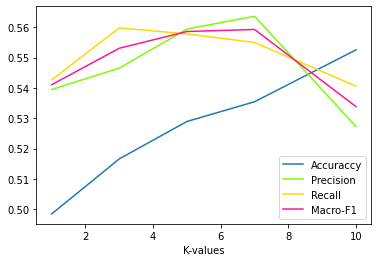

,K-values,Accuraccy,Precision,Recall,Macro-F1
0,1,0.498459,0.539478,0.542623,0.541046
1,3,0.516604,0.546513,0.559802,0.553077
2,5,0.528928,0.559401,0.557773,0.558586
3,7,0.535433,0.563617,0.554971,0.559260
4,10,0.552550,0.527236,0.540580,0.533825


In [32]:
def plotting_part1(df):
  df['Macro-F1'] = 2*((df['Precision'] * df['Recall'])/(df['Precision'] + df['Recall']))
  ax = plt.gca()

  df.plot(kind='line',x='K-values',y='Accuraccy',ax=ax)
  df.plot(kind='line',x='K-values',y='Precision', color='lawngreen', ax=ax)
  df.plot(kind='line',x='K-values',y='Recall', color='gold', ax=ax)
  # df.plot(kind='line',x='K-values',y='F1-Score', color='darkorchid', ax=ax)
  df.plot(kind='line',x='K-values',y='Macro-F1', color='deeppink', ax=ax)

  plt.show()
  return df

plotting_part1(df)

In [33]:
df.head()

,K-values,Accuraccy,Precision,Recall,Macro-F1
0,1,0.498459,0.539478,0.542623,0.541046
1,3,0.516604,0.546513,0.559802,0.553077
2,5,0.528928,0.559401,0.557773,0.558586
3,7,0.535433,0.563617,0.554971,0.559260
4,10,0.552550,0.527236,0.540580,0.533825


In [ ]:
# ax = plt.gca()

# df.plot(kind='line',x='K-values',y='Accuraccy',ax=ax)
# df.plot(kind='line',x='K-values',y='Precision', color='lawngreen', ax=ax)
# df.plot(kind='line',x='K-values',y='Recall', color='gold', ax=ax)
# df.plot(kind='line',x='K-values',y='F1-Score', color='darkorchid', ax=ax)
# df.plot(kind='line',x='K-values',y='Macro-F1', color='deeppink', ax=ax)

# plt.show()

# **Part 2**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
unique_list = unique_words(train)
X_train = train_feature_extract(train,unique_list)
X_test = test_feature_ext(test,unique_list)
# X_train = BoW_vectors
y_train = train['Sentiment']
# test_data = pd.read_csv('/content/drive/My Drive/Machine Learning Fall 2020/Programming_Assignment_1/test.csv')
# X_test = test_BoW_vectors
y_test= test['Sentiment']
labels_list = list(set(train['Sentiment']))

In [35]:
def scikit_impl_knn(k,X_train,y_train,X_test,y_test):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred, labels=labels_list)
  class_rep = classification_report(y_test, y_pred, labels=labels_list,output_dict = True)

  return accuracy, conf_matrix,class_rep



In [36]:
# accuracy, conf_matrix,class_rep = scikit_impl_knn(1)
# accuracy
# # conf_matrix
# # class_rep

In [37]:
# # conf_matrix
# print(class_rep)

In [38]:
# print(class_rep['macro avg']['precision'])

In [39]:
def scikit_run(k_values,X_train,y_train,X_test,y_test):
  accuracy_list = []
  conf_mat_list = []
  class_rep_list = []
  for i in k_values:
    print('Running For K = :',i)
    accuracy, conf_matrix,class_rep = scikit_impl_knn(i,X_train,y_train,X_test,y_test)
    accuracy_list.append(accuracy)
    conf_mat_list.append(conf_matrix)
    class_rep_list.append(class_rep)

  return accuracy_list, conf_mat_list, class_rep_list

In [40]:
def part2(X_train,y_train,X_test,y_test):
  k_values = [1,3,5,7,10]
  acc, conf, class_report = scikit_run(k_values, X_train,y_train,X_test,y_test)
  temp_df = pd.DataFrame()
  k_values = [1,3,5,7,10]
  precision_plt =[]
  recall_plt =[]
  f1_plt =[]
  for i in range(len(k_values)):
    precision_plt.append(class_report[i]['macro avg']['precision'])
    recall_plt.append(class_report[i]['macro avg']['recall'])
    f1_plt.append(class_report[i]['macro avg']['f1-score'])

  temp_df['K_values'] = k_values
  temp_df['Acuuracies'] = acc
  temp_df['Precision'] = precision_plt
  temp_df['Recall'] = recall_plt
  temp_df['F1-Score'] = f1_plt
  temp_df.head()

  return temp_df

In [41]:
def plotting_part2(temp_df):
  ax = plt.gca()

  temp_df.plot(kind='line',x='K_values',y='Acuuracies',ax=ax)
  temp_df.plot(kind='line',x='K_values',y='Precision',color='lawngreen', ax=ax)
  temp_df.plot(kind='line',x='K_values',y='Recall', color='gold', ax=ax)
  temp_df.plot(kind='line',x='K_values',y='F1-Score', color='deeppink', ax=ax)


  plt.show()

In [42]:
temp_df = part2(X_train,y_train,X_test,y_test)
temp_df.head()


Running For K = : 1
Running For K = : 3
Running For K = : 5
Running For K = : 7
Running For K = : 10


,K_values,Acuuracies,Precision,Recall,F1-Score
0,1,0.515235,0.533104,0.554226,0.502760
1,3,0.526532,0.543322,0.570814,0.518356
2,5,0.508045,0.546247,0.558531,0.501738
3,7,0.465936,0.515078,0.527360,0.459784
4,10,0.450873,0.513265,0.531686,0.449460


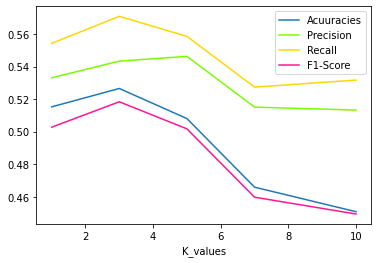

In [43]:
plotting_part2(temp_df)

# **Part 3**

In [44]:
pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 65.9MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [45]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

--2020-10-16 14:45:06--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.65.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.65.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  95.9MB/s    in 16s     

2020-10-16 14:45:22 (95.5 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



**Step 2: Load the necessary modules**

In [46]:
from gensim.models import KeyedVectors
import numpy as np

**Step 3: Load the pre-trained representations**

In [47]:
word2vec = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

**Step 4: Define a feature extractor**

In [48]:
def extract_features(text):
  words = [word for word in text.split() if word in word2vec.vocab]
  return np.mean(word2vec[words], axis=0)

**Step 5: Test the feature extractor**

In [49]:
text = "This is a cat"
text_embedding = extract_features(text)
# text_embedding
# print ("Shape of embedding: ", text_embedding.shape)

In [50]:
train_embedding = []
for tweet in train['Tweet']:
  # print(tweet)
  try:
    tweet_embed = extract_features(tweet)
    train_embedding.append(tweet_embed)
  except:
    pass





In [51]:
train_vector = np.asarray(train_embedding)

In [52]:
test_embedding = []
for test_tweet in test['Tweet']:
  try:
    test_embed = extract_features(test_tweet)
    test_embedding.append(test_embed)
  except:
    pass


In [53]:
test_vector = np.asarray(test_embedding)

In [54]:
# print(train_vector.shape)
# print(test_vector.shape)

In [55]:
k_values = [1,3,5,7,10]
test_data =  part1(test_vector,train_vector)
accuraccy_list, precision_list, recall_list,f1_list = evaluate(k_values,test_data)

p3_df = pd.DataFrame()
p3_df['K-values'] = k_values
p3_df['Accuraccy'] = accuraccy_list
p3_df['Precision'] = precision_list
p3_df['Recall'] = recall_list
p3_df['F1-Score'] = f1_list

Running for K:  1
Running for K:  3
Running for K:  5
Running for K:  7
Running for K:  10

For K = 1: 
Classification Accuracy:  0.5296131461828141
Macro Avergae Precision:  0.3534120495550559
Macro Avergae recall:  0.3543098249264289
Macro Avergae f1_score:  0.35386036780757485
Confusion Matrix (tp,fp,fn,tn):  [('negative', 1127, 647, 707, 440), ('neutral', 152, 496, 463, 1810), ('positive', 95, 404, 377, 2045)]



For K = 3: 
Classification Accuracy:  0.4755220814789456
Macro Avergae Precision:  0.3646801762605532
Macro Avergae recall:  0.35910749029490924
Macro Avergae f1_score:  0.36187238028101226
Confusion Matrix (tp,fp,fn,tn):  [('negative', 1340, 746, 494, 341), ('neutral', 122, 365, 493, 1941), ('positive', 70, 278, 402, 2171)]



For K = 5: 
Classification Accuracy:  0.44813420061622733
Macro Avergae Precision:  0.3569998837419193
Macro Avergae recall:  0.3492358648241307
Macro Avergae f1_score:  0.3530751973229036
Confusion Matrix (tp,fp,fn,tn):  [('negative', 1475, 837, 35

In [56]:
p3_df.head()

,K-values,Accuraccy,Precision,Recall,F1-Score
0,1,0.529613,0.353412,0.354310,0.353860
1,3,0.475522,0.364680,0.359107,0.361872
2,5,0.448134,0.357000,0.349236,0.353075
3,7,0.417665,0.369863,0.354107,0.361813
4,10,0.395413,0.392301,0.353047,0.371640


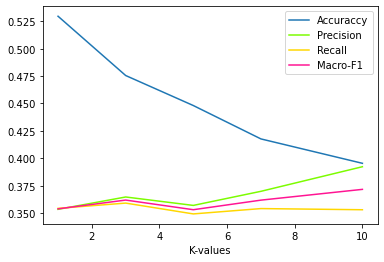

,K-values,Accuraccy,Precision,Recall,F1-Score,Macro-F1
0,1,0.529613,0.353412,0.354310,0.353860,0.353860
1,3,0.475522,0.364680,0.359107,0.361872,0.361872
2,5,0.448134,0.357000,0.349236,0.353075,0.353075
3,7,0.417665,0.369863,0.354107,0.361813,0.361813
4,10,0.395413,0.392301,0.353047,0.371640,0.371640


In [57]:
p3_df = plotting_part1(p3_df)
p3_df.head()

**Running Part 2**

In [58]:
temp_df_3 = part2(X_train,y_train,X_test,y_test)
 

Running For K = : 1
Running For K = : 3
Running For K = : 5
Running For K = : 7
Running For K = : 10


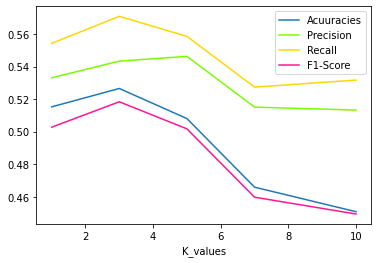

In [59]:
plotting_part2(temp_df_3)

In [60]:
temp_df_3.head()

,K_values,Acuuracies,Precision,Recall,F1-Score
0,1,0.515235,0.533104,0.554226,0.502760
1,3,0.526532,0.543322,0.570814,0.518356
2,5,0.508045,0.546247,0.558531,0.501738
3,7,0.465936,0.515078,0.527360,0.459784
4,10,0.450873,0.513265,0.531686,0.449460
